In [1]:
# Plots for SOR talk

In [1]:
import numpy as np
import glob
import matplotlib.pyplot as plt
import matplotlib
import os
import random

/home/rahul/anaconda3/lib/python3.12/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/rahul/anaconda3/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


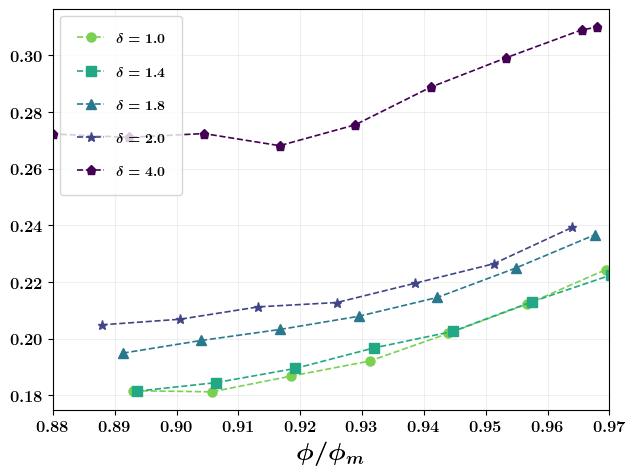

In [3]:
import numpy as np
import glob
import matplotlib.pyplot as plt
import matplotlib
import os
import random

# Matplotlib rc parameters modification

plt.rcParams.update({
  "figure.max_open_warning" : 0,
  "text.usetex"             : True,
  "text.latex.preamble"     : r"\usepackage{amsmath, bm, type1cm}",  # Added \bm for bold math
  "figure.autolayout"       : True,
  "font.family"             : "STIXGeneral",
  "mathtext.fontset"        : "stix",
  "font.size"               : 8,
  "xtick.labelsize"         : 8,
  "ytick.labelsize"         : 8,
  "lines.linewidth"         : 1,
  "lines.markersize"        : 5,
})
#plt.rcParams['text.latex.preamble']= r"\usepackage{amsmath}"
matplotlib.rc('text', usetex=True)
matplotlib.rcParams['text.latex.preamble'] = r'\boldmath'

# reading rig files

def rigList(rigFile):
    hashCounter = -4
    clusterIDs  = []
    for line in rigFile:
        if line[0] == '#':
            hashCounter += 1
        elif hashCounter >= 0:
            clusterIDs.append(line.strip())
    return clusterIDs

def particleSizeList(randomSeedFile, sizeRatio, npp = 1000):
    '''
    This function reads the random seed file and creates
    a list of particle sizes. The list index is the particle index.

    Inputs:
    randomSeedFile - location for the random seed file. It contains the particle index and sizes
    sizeRatio      - delta or ar for the case
    npp            - system size
    '''

    if sizeRatio == 1:
        # Painting particles randomly in two colours for monodisperse case.
        particleSize = [1]*(int(npp/2)) + [2]*(int(npp/2))
        random.shuffle(particleSize)
    else:
        particleSize = np.loadtxt(randomSeedFile, usecols = 3) # reading only column 3 which has particle size
        randomSeedFile.close()
    return particleSize


def interactionsList(interactionFile):
    '''
    This function reads the interaction file and creates a nested-list,
    each list inside contains the array of all interaction parameters for
    that timestep.

    Input: interactionFile - the location of the interaction data file
    '''

    hashCounter = 0
    temp        = []
    contactList = [] # list with interaction parameters for each element at each timestep

    fileLines = interactionFile.readlines()[27:] # skipping the comment lines
    for line in fileLines:
        if not line.split()[0] == '#':
            lineList = [float(value) for value in line.split()]
            temp.append(lineList)
        else:
            hashCounter += 1 # checking if counter reaches 7 (7 lines of comments after every timestep data)
            if hashCounter == 7: 
                contactList.append(np.array(temp))
                temp        = []
                hashCounter = 0
    interactionFile.close()
    return contactList

def parametersList(ParametersFile):
    '''
    This function reads the parameters file and creates a nested-list,
    each list inside contains the array of all interaction parameters for
    that timestep.

    Input: ParametersFile - the location of the parameters data file
    '''

    parFile = open(ParametersFile, 'r')

    hashCounter = 0
    temp        = []
    parList     = [] # list with parameters parameters for each element at each timestep

    fileLines = parFile.readlines()[22:] # skipping the comment lines
    for line in fileLines:
        if not line.split()[0] == '#':
            lineList = [float(value) for value in line.split()]
            temp.append(lineList)
        else:
            hashCounter += 1 # checking if counter reaches 7 (7 lines of comments after every timestep data)
            if hashCounter == 7: 
                parList.append(np.array(temp))
                temp        = []
                hashCounter = 0
    parFile.close()
    return parList





# min gap plot 1

phi = [0.70, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.792]
ar  = [1.0, 1.4, 1.8, 2.0, 4.0]

npp           = 1000
cmap          = matplotlib.colormaps['viridis_r'] #color scheme
topDir        = '/media/rahul/Rahul_2TB/high_bidispersity'
fig_save_path = "/media/Linux_1TB/City College Dropbox/Rahul Pandare/CUNY/Research/Bidisperse Project/SOR_meeting/figures/"

phim         = [0.7839319645227314,0.783317545762567,0.7854135245320721,0.7884149253842823,0.8181942616808251]
off          = 100
line_markers = ['o', 's', '^', '*', 'p']

datax = []
datay = []

for j, arj in enumerate(ar):
    gaplist = []
    for i, phii in enumerate(phi):
        maxgap = []
        phir = '{:.3f}'.format(phii) if len(str(phii).split('.')[1])>2 else '{:.2f}'.format(phii)
        for l in range(1):
            workDir = f'{topDir}/NP_1000/phi_{phir}/ar_{ar[j]}/Vr_0.5/run_{l+1}'
            if not os.path.exists(workDir):
                continue
            file_name = glob.glob(f'{workDir}/int_*.dat')[0]
            interFile   = open(f'{file_name}', 'r')
            contactList = interactionsList(interFile)
            for sampleList in contactList[off:]:
                gap =[]
                for i in range (sampleList.shape[0]):
                    if int(sampleList[i,10]) == 2:
                        g = sampleList[i,5]
                        gapPerc = -g*100
                        gap.append(gapPerc)
                maxgap.append(np.max(gap))
            del contactList
        gaplist.append(np.mean(maxgap))

    phif     = [x/phim[j] for x, g in zip(phi, gaplist) if not np.isnan(g)]
    gaplistf = [x for x in gaplist if not np.isnan(x)]

    datax.append(phif)
    datay.append(gaplistf)
    plt.plot(phif, gaplistf, linestyle='--',marker = line_markers[j], label=r'$\delta = {:.1f}$'.format(arj), color=cmap((j+1)/len(ar)),linewidth=1.2, markersize=6.5)

plt.grid(which='Both', alpha=0.2)
#plt.xlabel(r'$\phi$', fontsize=14,fontstyle='italic')
plt.xlabel(r'$\phi/\phi_{m}$', fontsize=18,fontstyle='italic', fontweight='bold')
plt.ylabel('% Overlap', fontsize=14,fontstyle='italic')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.xlim(0.88, 0.97)
plt.legend()
plt.legend(loc='upper left', fontsize=10, labelspacing=1.5,borderpad=1.2)
plt.tight_layout()

figsave=True

if figsave:
    figFormat = ".svg"
    plt.savefig(fig_save_path+ "mean_max_gap_" +str(npp)+figFormat, bbox_inches="tight",dpi=800)

plt.show()

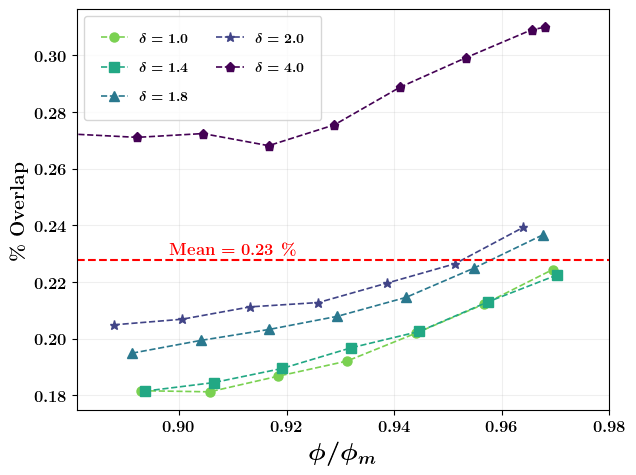

In [38]:
## Plotting mean gap

for kk in range(len(datax)):
    plt.plot(datax[kk], datay[kk], linestyle='--', marker = line_markers[kk], label=r'$\delta = {:.1f}$'.format(ar[kk]), color=cmap((kk+1)/len(ar)),linewidth=1.2, markersize=6.5)

plt.grid(which='Both', alpha=0.2)
plt.xlabel(r'$\phi/\phi_{m}$', fontsize=18,fontstyle='italic', fontweight='bold')
plt.ylabel(r'\textbf{\% Overlap}', fontsize=14,fontstyle='italic')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

flat_datax = [ii for sublist in datay for ii in sublist]
plt.axhline(y=np.mean(flat_datax), color='r', linestyle='--', linewidth=1.5)
plt.text(0.91, 0.23, r'\textbf{Mean = 0.23 \%}', color='r', fontsize=12, ha='center')

plt.xlim(0.881, 0.98)
plt.legend(loc='best', fontsize=10, labelspacing=1.2,borderpad=1.2, ncol=2)
plt.tight_layout()

figsave=True

if figsave:
    figFormat = ".svg"
    plt.savefig(fig_save_path+ "mean_max_gap_2_" +str(npp)+figFormat, bbox_inches="tight",dpi=800)

plt.show()

In [25]:
np.mean([ii for sublist in datay for ii in sublist])

0.22792326373178426

In [31]:
[ii for sublist in datay for ii in sublist].max()

AttributeError: 'list' object has no attribute 'max'

In [28]:
datax.max()

AttributeError: 'list' object has no attribute 'max'

In [24]:
[ii for sublist in datay for ii in sublist]

[0.18167183265306125,
 0.18127749367346938,
 0.18680235346938773,
 0.19211588102040816,
 0.20189489588235293,
 0.21222173736842104,
 0.22439733736842105,
 0.18151981632653064,
 0.18452449265306123,
 0.18951588673469388,
 0.19677334,
 0.2025919011764706,
 0.21302938578947367,
 0.22243358789473686,
 0.19490792836734694,
 0.19938836428571427,
 0.20326418795918366,
 0.20791079775510204,
 0.21456769382352942,
 0.2249673052631579,
 0.23663644947368423,
 0.2048975424489796,
 0.2068713512244898,
 0.2112409026530612,
 0.21276385836734693,
 0.21957757647058823,
 0.2264217663157895,
 0.23922905789473684,
 0.2767541424489796,
 0.27325209857142857,
 0.2721886563265306,
 0.27100605163265307,
 0.2723453020588235,
 0.2680752010526316,
 0.27541841052631577,
 0.2887027226315789,
 0.29908042999999995,
 0.3089284352631579,
 0.30984111071428566]

In [19]:
datay

[[0.18167183265306125,
  0.18127749367346938,
  0.18680235346938773,
  0.19211588102040816,
  0.20189489588235293,
  0.21222173736842104,
  0.22439733736842105],
 [0.18151981632653064,
  0.18452449265306123,
  0.18951588673469388,
  0.19677334,
  0.2025919011764706,
  0.21302938578947367,
  0.22243358789473686],
 [0.19490792836734694,
  0.19938836428571427,
  0.20326418795918366,
  0.20791079775510204,
  0.21456769382352942,
  0.2249673052631579,
  0.23663644947368423],
 [0.2048975424489796,
  0.2068713512244898,
  0.2112409026530612,
  0.21276385836734693,
  0.21957757647058823,
  0.2264217663157895,
  0.23922905789473684],
 [0.2767541424489796,
  0.27325209857142857,
  0.2721886563265306,
  0.27100605163265307,
  0.2723453020588235,
  0.2680752010526316,
  0.27541841052631577,
  0.2887027226315789,
  0.29908042999999995,
  0.3089284352631579,
  0.30984111071428566]]

In [111]:
# Matplotlib rc parameters modification

plt.rcParams.update({
  "figure.max_open_warning" : 0,
  "text.usetex"             : True,
  "text.latex.preamble"     : r"\usepackage{amsmath, bm, type1cm}",  # Added \bm for bold math
  "figure.autolayout"       : True,
  "font.family"             : "STIXGeneral",
  "mathtext.fontset"        : "stix",
  "font.size"               : 8,
  "xtick.labelsize"         : 8,
  "ytick.labelsize"         : 8,
  "lines.linewidth"         : 1,
  "lines.markersize"        : 5,
})
#plt.rcParams['text.latex.preamble']= r"\usepackage{amsmath}"
matplotlib.rc('text', usetex=True)
matplotlib.rcParams['text.latex.preamble'] = r'\boldmath'

In [3]:
# reading rig files
def rigList(rigFile):
    hashCounter = -4
    clusterIDs  = []
    for line in rigFile:
        if line[0] == '#':
            hashCounter += 1
        elif hashCounter >= 0:
            clusterIDs.append(line.strip())
    return clusterIDs

def particleSizeList(randomSeedFile, sizeRatio, npp = 1000):
    '''
    This function reads the random seed file and creates
    a list of particle sizes. The list index is the particle index.

    Inputs:
    randomSeedFile - location for the random seed file. It contains the particle index and sizes
    sizeRatio      - delta or ar for the case
    npp            - system size
    '''

    if sizeRatio == 1:
        # Painting particles randomly in two colours for monodisperse case.
        particleSize = [1]*(int(npp/2)) + [2]*(int(npp/2))
        random.shuffle(particleSize)
    else:
        particleSize = np.loadtxt(randomSeedFile, usecols = 3) # reading only column 3 which has particle size
        randomSeedFile.close()
    return particleSize

/tmp/ipykernel_81906/259970512.py:76: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  plt.yscale('log')


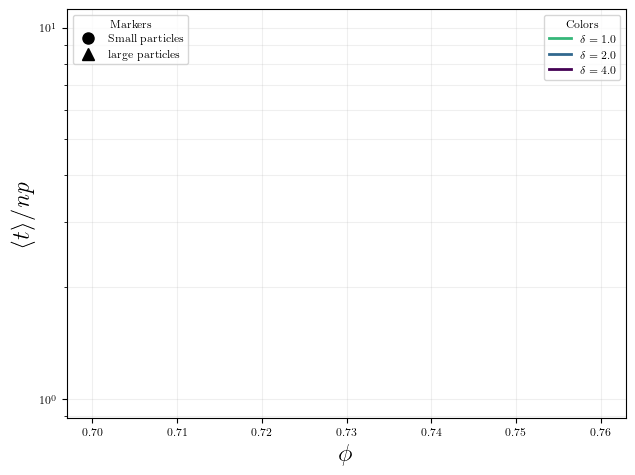

In [13]:
from matplotlib.lines import Line2D

NP      = [1000]

phi     = [0.70,0.71,0.72,0.73,0.74,0.75,0.76] #,0.78,0.79,0.792]

ar      = [1.0, 2.0, 4.0]

numRuns = 1
ranSeedFile = "random_seed.dat"

topDir = '/media/rahul/Rahul_2TB/high_bidispersity'

#file_name = glob.glob('data_*.dat') 
cmap = matplotlib.colormaps['viridis_r']
off = 100

line_markers = ['o','^']

for i in range(len(NP)):
    for k in range(len(ar)):
        times=[]
        timel=[]
        for j in range(len(phi)):
            s = 0
            l = 0
            phir = '{:.3f}'.format(phi[j]) if len(str(phi[j]).split('.')[1])>2 else '{:.2f}'.format(phi[j])
            for l in range(numRuns):
                workDir = f'{topDir}/NP_{NP[i]}/phi_{phir}/ar_{ar[k]}/Vr_0.5/run_{l+1}'
                if os.path.exists(workDir):
                    rigFile = open(glob.glob(f'{workDir}/rig_*.dat')[0])
                    rigClusterIDs = rigList(rigFile)
    
                    clusterIDflat = [x  for x in rigClusterIDs[off:] if len(x) > 1]
                    flattenIDs    = [x  for x in clusterIDflat if len(x) > 1] # removing samples with no rigid clusters
                    clusterIDs    = [int(num) for sublist in flattenIDs for num in sublist.split(',')]
    
                    #particleSizeList(randomSeedFile, sizeRatio, npp = 1000)
                    ranFile      = open(f'{workDir}/{ranSeedFile}', 'r')
                    particleSize = particleSizeList(ranFile, sizeRatio = ar[k])
    
                    ranFile = open(f'{workDir}/{ranSeedFile}', 'r')
                    lines   = ranFile.readlines()
                    nps     = int(lines[1].split()[1])
                    npl     = int(lines[1].split()[2])
    
                    for ii, index in enumerate(clusterIDs):
                        if particleSize[index] == 1:
                            s += 1
                        else:
                            l += 1
            times.append(s/(len(rigClusterIDs[off:])*nps) if s > 0 else np.nan)
            timel.append(l/(len(rigClusterIDs[off:])*npl) if l > 0 else np.nan)
        timesx = [ int(y)/(numRuns) if not np.isnan(y) else np.nan for y in times ]
        timelx = [ int(y)/(numRuns) if not np.isnan(y) else np.nan for y in timel ]
    
        plt.plot(phi, timesx, linestyle='--', marker=line_markers[0], color=cmap((k+1)/len(ar)), linewidth=1.2)
        plt.plot(phi, timelx, linestyle='--', marker=line_markers[1], color=cmap((k+1)/len(ar)), linewidth=1.2)

marker_legend_elements = [
    Line2D([0], [0], color='black', marker=line_markers[0], lw=0, label=f'Small particles', markersize=8),
    Line2D([0], [0], color='black', marker=line_markers[1], lw=0, label=f'large particles', markersize=8)
    ]
color_legend_elements = [
        Line2D([0], [0], color=cmap((k + 1) / len(ar)), lw=2, label=r'$\delta = {:.1f}$'.format(ar[k]))
        for k in range(len(ar))
        ]

legend1 = plt.legend(handles=color_legend_elements, loc='upper right', title="Colors")
legend2 = plt.legend(handles=marker_legend_elements, loc='upper left', title="Markers")
plt.gca().add_artist(legend1)

plt.grid(which='both', alpha=0.2)
plt.yscale('log')
plt.xlabel(r'$\phi$', fontsize=18, fontweight='bold', style='italic')
plt.ylabel(r'$\langle t \rangle / \textit{np}$', fontsize=18, fontweight='bold', style='italic')

plt.tight_layout()
plt.show()

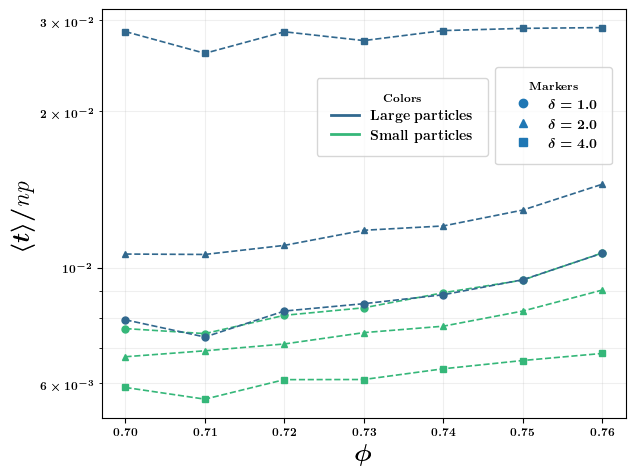

In [128]:
from matplotlib.lines import Line2D

NP      = [1000]

phi     = [0.70,0.71,0.72,0.73,0.74,0.75,0.76] #,0.78,0.79,0.792]

ar      = [1.0, 2.0, 4.0]

numRuns = 4
ranSeedFile = "random_seed.dat"

topDir = '/media/rahul/Rahul_2TB/high_bidispersity'

#file_name = glob.glob('data_*.dat') 
cmap = matplotlib.colormaps['viridis_r']
off = 100

line_markers = ['o','^', 's']

for i,np in enumerate(NP):
    for j, arj in enumerate(ar):
        times = []
        timel = []
        for k, phij in enumerate(phi):
            s = 0
            l = 0
            phir = '{:.3f}'.format(phij) if len(str(phij).split('.')[1]) > 2 else '{:.2f}'.format(phij)
            for ll in range(numRuns):
                workDir = f'{topDir}/NP_{np}/phi_{phir}/ar_{arj}/Vr_0.5/run_{ll+1}'
                if os.path.exists(workDir):
                    rigFile = open(glob.glob(f'{workDir}/rig_*.dat')[0])
                    rigClusterIDs = rigList(rigFile)
                    numSamples = len(rigClusterIDs[off:])
                    
                    clusterIDflat = [x  for x in rigClusterIDs[off:] if len(x) > 1]
                    flattenIDs    = [x  for x in clusterIDflat if len(x) > 1] # removing samples with no rigid clusters
                    clusterIDs    = [int(num) for sublist in flattenIDs for num in sublist.split(',')]

                    s += sum(particleSize[clusterIDs] == 1)
                    l += sum(particleSize[clusterIDs] != 1)
            times.append(s/(numSamples*nps*numRuns) if s > 0 else np.nan)
            timel.append(l/(numSamples*npl*numRuns) if l > 0 else np.nan)
            
        plt.plot(phi, times, linestyle='--', marker=line_markers[j], color=cmap(1/len(ar)), linewidth=1.2)
        plt.plot(phi, timel, linestyle='--', marker=line_markers[j], color=cmap(2/len(ar)), linewidth=1.2)

color_legend_elements = [
    Line2D([0], [0], color=cmap(2 / len(ar)), lw=2, label=r'\textbf{Large particles}'),
    Line2D([0], [0], color=cmap(1 / len(ar)), lw=2, label=r'\textbf{Small particles}')
    ]

marker_legend_elements = [
        Line2D([0], [0], marker=line_markers[j],lw=0, label=r'$\delta = {:.1f}$'.format(ar[j]), markersize=6)
        for j in range(len(ar))
        ]

legend1 = plt.legend(handles=color_legend_elements, loc=(0.41, 0.64), 
                     title=r"\textbf{Colors}", borderpad=1.05, prop={'size': 10})
legend2 = plt.legend(handles=marker_legend_elements, loc=(0.75, 0.62), 
                     title=r"\textbf{Markers}", borderpad=1.05, prop={'size': 10})
plt.gca().add_artist(legend1)

plt.grid(which='both', alpha=0.2)
plt.yscale('log')
plt.xlabel(r'$\phi$', fontsize=18, fontweight='bold', style='italic')
plt.ylabel(r'$\langle t \rangle / \textit{np}$', fontsize=18, fontweight='bold', style='italic')

plt.tight_layout()
plt.show()

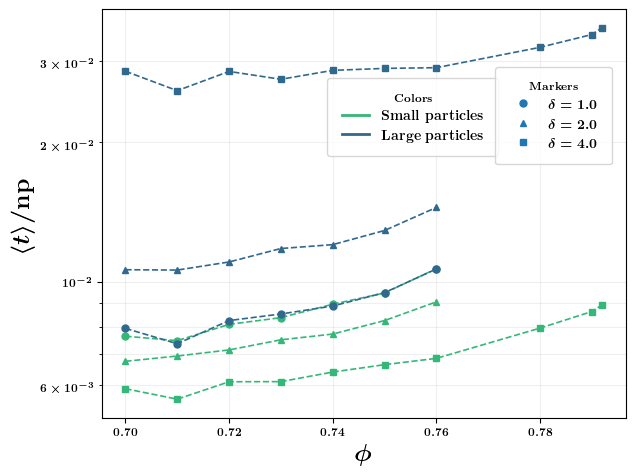

In [124]:
from matplotlib.lines import Line2D
import numpy as np

NP      = [1000]

phi     = [0.70,0.71,0.72,0.73,0.74,0.75,0.76,0.78,0.79,0.792]

ar      = [1.0, 2.0, 4.0]

numRuns = 4
ranSeedFile = "random_seed.dat"

topDir = '/media/rahul/Rahul_2TB/high_bidispersity'

#file_name = glob.glob('data_*.dat') 
cmap = matplotlib.colormaps['viridis_r']
off = 100

line_markers = ['o','^', 's']

for i,npp in enumerate(NP):
    for j, arj in enumerate(ar):
        times = []
        timel = []
        for k, phij in enumerate(phi):
            s = 0
            l = 0
            phir = '{:.3f}'.format(phij) if len(str(phij).split('.')[1]) > 2 else '{:.2f}'.format(phij)
            for ll in range(numRuns):
                workDir = f'{topDir}/NP_{npp}/phi_{phir}/ar_{arj}/Vr_0.5/run_{ll+1}'
                if os.path.exists(workDir):
                    rigFile = open(glob.glob(f'{workDir}/rig_*.dat')[0])
                    rigClusterIDs = rigList(rigFile)
                    numSamples = len(rigClusterIDs[off:])
                    
                    clusterIDflat = [x  for x in rigClusterIDs[off:] if len(x) > 1]
                    flattenIDs    = [x  for x in clusterIDflat if len(x) > 1] # removing samples with no rigid clusters
                    clusterIDs    = [int(num) for sublist in flattenIDs for num in sublist.split(',')]

                    s += sum(particleSize[clusterIDs] == 1)
                    l += sum(particleSize[clusterIDs] != 1)
            times.append(s/(numSamples*nps*numRuns) if s > 0 else np.nan)
            timel.append(l/(numSamples*npl*numRuns) if l > 0 else np.nan)
            
        plt.plot(phi, times, linestyle='--', marker=line_markers[j], color=cmap(1/len(ar)), linewidth=1.2)
        plt.plot(phi, timel, linestyle='--', marker=line_markers[j], color=cmap(2/len(ar)), linewidth=1.2)

color_legend_elements = [
    Line2D([0], [0], color=cmap(1 / len(ar)), lw=2, label=r'\textbf{Small particles}', markersize=9),
    Line2D([0], [0], color=cmap(2 / len(ar)), lw=2, label=r'\textbf{Large particles}', markersize=9)
    ]

marker_legend_elements = [
        Line2D([0], [0], marker=line_markers[j],lw=0, label=r'$\delta = {:.1f}$'.format(ar[j]))
        for j in range(len(ar))
        ]

legend1 = plt.legend(handles=color_legend_elements, loc=(0.43, 0.64), 
                     title=r"\textbf{Colors}", borderpad=1.05, prop={'size': 10})
legend2 = plt.legend(handles=marker_legend_elements, loc=(0.75, 0.62), 
                     title=r"\textbf{Markers}", borderpad=1.05, prop={'size': 10})
plt.gca().add_artist(legend1)

plt.grid(which='both', alpha=0.2)
plt.yscale('log')
plt.xlabel(r'$\phi$', fontsize=18, fontweight='bold', style='italic')
plt.ylabel(r'$\langle t \rangle / \textbf{np}$', fontsize=18, fontweight='bold', style='italic')

plt.tight_layout()
plt.show()

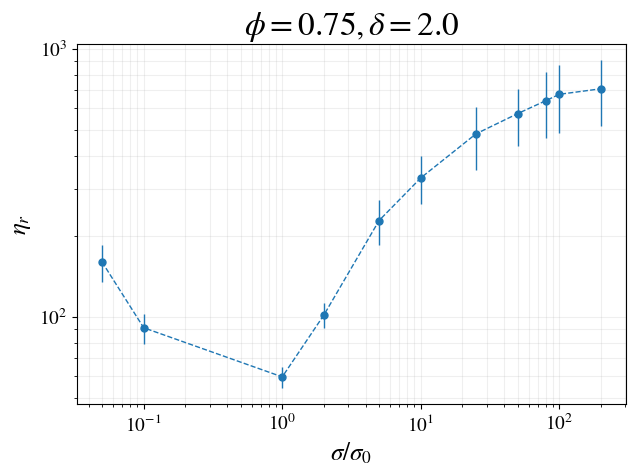

In [20]:
plt.rcParams.update({
    "figure.max_open_warning": 0,
    "text.usetex": False,  # Disable full LaTeX rendering
    "font.family": "STIXGeneral",
    "mathtext.fontset": "stix",
    "font.size": 8,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8,
    "lines.linewidth": 1,
    "lines.markersize": 5
})

NP          = [1000]

phi         = [0.75]

ar          = [2.0]

numRuns = 1

stress = ['0.05', '0.1', '1', '2', '5', '10', '25', '50', '80', '100', '200']
stress1 = [float(s) for s in stress]

topDir = '/Users/rahul/Documents/Simulations/low_stress'

#file_name = glob.glob('data_*.dat') 
cmap = matplotlib.colormaps['viridis_r']
visc = []
visc_std = []
off=100

for s in range(len(stress)):
    for i in range(len(NP)):
        for j in range(len(phi)):
            for k in range(len(ar)):
                for l in range(numRuns):
                    workDir = f'{topDir}/stress_{stress[s]}r/NP_{NP[i]}/phi_{phi[j]}/ar_{ar[k]}/Vr_0.5/run_{l+1}'
                    file_name = glob.glob(f'{workDir}/data_*.dat')[0]
                    with open(f'{file_name}','r') as file:
                        data_array = np.loadtxt(file)  # Load all data into a 2D array
                        strain = data_array[:, 1]  # Extract the second column (usecols=1)
                        data = data_array[:, 3][off:]
                        visc.append(np.mean(data))
                        visc_std.append(np.std(data))
                        #plt.figure()
                        
plt.errorbar(stress1, visc, yerr=visc_std, fmt='--o')
plt.grid(which='both', alpha=0.2)

plt.xlabel(r'$\sigma/\sigma_0$', fontsize=18, fontweight='bold', style='italic')
plt.ylabel(r'$\eta_r$', fontsize=18, fontweight='bold', style='italic')
plt.title(r'$\phi = 0.75, \delta = 2.0$', fontsize=24, fontweight='bold')

plt.xscale('log')
plt.yscale('log')

plt.xticks([0.1, 1, 10, 100], [r'$10^{-1}$', r'$10^{0}$', r'$10^{1}$', r'$10^{2}$'], fontsize=14, fontweight='bold')
plt.yticks([100, 1000], [r'$10^{2}$', r'$10^{3}$'], fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

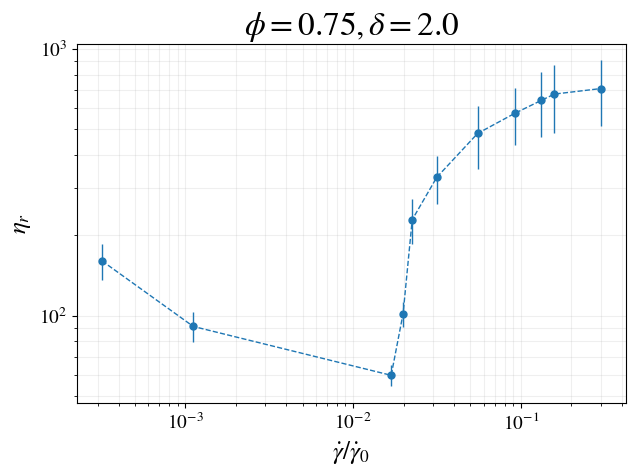

In [36]:
# shear rate

plt.rcParams.update({
    "figure.max_open_warning": 0,
    "text.usetex": False,  # Disable full LaTeX rendering
    "font.family": "STIXGeneral",
    "mathtext.fontset": "stix",
    "font.size": 8,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8,
    "lines.linewidth": 1,
    "lines.markersize": 5
})

NP          = [1000]

phi         = [0.75]

ar          = [2.0]

numRuns = 1

stress = ['0.05', '0.1', '1', '2', '5', '10', '25', '50', '80', '100', '200']
stress1 = [float(s) for s in stress]

topDir = '/Users/rahul/Documents/Simulations/low_stress'

#file_name = glob.glob('data_*.dat') 
cmap = matplotlib.colormaps['viridis_r']
visc = []
visc_std = []

srate = []
#srate_std = []
off=100

for s in range(len(stress)):
    for i in range(len(NP)):
        for j in range(len(phi)):
            for k in range(len(ar)):
                for l in range(numRuns):
                    workDir = f'{topDir}/stress_{stress[s]}r/NP_{NP[i]}/phi_{phi[j]}/ar_{ar[k]}/Vr_0.5/run_{l+1}'
                    file_name = glob.glob(f'{workDir}/data_*.dat')[0]
                    with open(f'{file_name}','r') as file:
                        data_array = np.loadtxt(file)  # Load all data into a 2D array
                        strain = data_array[:, 1]  # Extract the second column (usecols=1)
                        data = data_array[:, 3][off:]
                        ydata = data_array[:, 2][off:] # shear rate
                        visc.append(np.mean(data))
                        visc_std.append(np.std(data))
                        srate.append(np.mean(ydata))
                        #plt.figure()
                        
plt.errorbar(srate, visc, yerr=visc_std, fmt='--o')
plt.grid(which='both', alpha=0.2)

plt.xlabel(r'$\dot{\gamma}/\dot{\gamma}_0$', fontsize=18, fontweight='bold', style='italic')
plt.ylabel(r'$\eta_r$', fontsize=18, fontweight='bold', style='italic')
plt.title(r'$\phi = 0.75, \delta = 2.0$', fontsize=24, fontweight='bold')

plt.xscale('log')
plt.yscale('log')

plt.xticks([1e-3, 1e-2, 1e-1], [r'$10^{-3}$', r'$10^{-2}$', r'$10^{-1}$'], fontsize=14, fontweight='bold')
plt.yticks([100, 1000], [r'$10^{2}$', r'$10^{3}$'], fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

/Users/rahul/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


+-------+-------+-------+-------+
| delta | phi_m |   C   |   R2  |
+-------+-------+-------+-------+
|  1.0  | 0.784 | 1.567 | 0.998 |
|  1.4  | 0.777 | 0.978 | 0.999 |
|  1.8  | 0.785 | 1.566 | 1.000 |
|  2.0  | 0.788 | 1.596 | 1.000 |
|  4.0  | 0.818 | 2.045 | 0.999 |
+-------+-------+-------+-------+

 R-squared mean: 0.999


<Figure size 640x480 with 0 Axes>

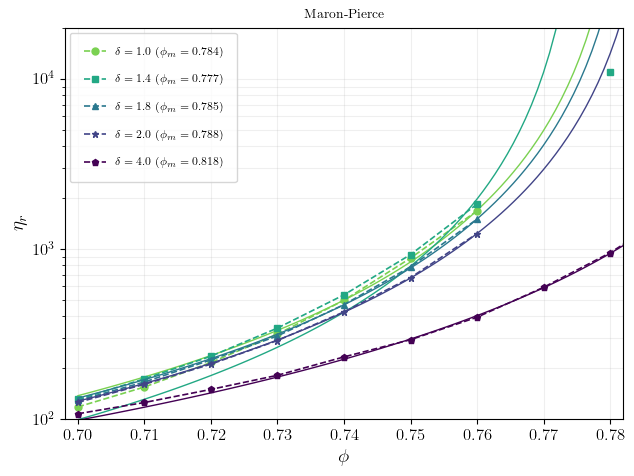

In [67]:
# maron pierce plot

from prettytable import PrettyTable
import warnings
warnings.filterwarnings("ignore", message="Mean of empty slice.", category=RuntimeWarning)
warnings.filterwarnings("ignore", message="invalid value encountered in scalar divide", category=RuntimeWarning)

from scipy.optimize import curve_fit

npp = 1000
y   = 3    #rheological parameter  -viscosity

fig_save_path = "/media/Linux_1TB/Dropbox (City College)/CUNY/Research/Bidisperse Project/analysis/figures/"

plt.clf()

# Parameters
numRuns=4

phi = [0.70,0.71,0.72,0.73,0.74,0.75,0.76,0.77,0.78,0.79, 0.792]

ar  = [1.0, 1.4, 1.8, 2.0, 4.0]

phi_vals  = phi

arr       = ar

cmap = matplotlib.colormaps['viridis_r'] #color scheme
line_markers = ['o', 's', '^', '*', 'p']

## Models to predict the relative viscosity of suspensions of rigid solid particles

# Maron & Pierce (1956)
def maronpierce(x,c, k):
    return c*(1 - (x/k)) ** -2

#Krieger & Dougherty (1959)
def kriegerdougherty(x,c,k):
    return c*(1 - (x/k))**(-2.5*k)

#Frankel & Acrivos (1967)
def frankelacrivos(x,c,k):
    r=x/k
    return c * 9/8 * (r**(1/3)/(1-r**(1/3)))

#Chong et al. (1971)
def chong(x,c,k):
    r=x/k
    return c*(1 + 0.75*r/(1 - r))**2

#Lewis & Nielsen (1968)
def lewisnielsen(x,c,k):
    return c * (1 + (1.5*x/(1 - (x/k))))**2

#Mendoza (2011)
def mendoza(x,c,k):
    r=(1-k)/k
    return c*(1 - x/(1 - r*x))**-2.5

models = [maronpierce ,kriegerdougherty, frankelacrivos, lewisnielsen, chong, mendoza]
title_ = ["Maron-Pierce",r"Krieger \& Dougherty (1959)", r'Frankel \& Acrivos (1967)', r'Lewis & Nielsen (1968)', r'Chong et al. (1971)', r'Mendoza (2011)']

model = maronpierce # Choosing a model to fit

topDir = '/Volumes/Rahul_2TB/high_bidispersity'

off = 100

plt.figure()

visclist = []
philist = []

rerr    = [] # r2 error
phim    = [] # max phi calculated from fitting
c_list  = [] # free parameter c in the model
k_guess = [.785,.785,.785,.788,.8] # initial guess for max phi (phim)

for j, arj in enumerate(arr):
    visc = []
    for i, phii in enumerate(phi_vals):
        dat = []
        phir = '{:.3f}'.format(phii) if len(str(phii).split('.')[1])>2 else '{:.2f}'.format(phii)
        for l in range(numRuns):
            workDir = f'{topDir}/NP_1000/phi_{phir}/ar_{ar[j]}/Vr_0.5/run_{l+1}'
            if not os.path.exists(workDir):
                continue
            file_name = glob.glob(f'{workDir}/data_*.dat')[0]
            with open(f'{file_name}','r') as file:
                data_array = np.loadtxt(file) 
                data = data_array[:, 3][off:]
                dat.append(np.mean(data))
                #print(dat)
        visc.append(np.mean(dat))
       
    # points to fit
    viscf = [x for x in visc if not np.isnan(x)] # filtered dat list to remove 'nan'
    phif  = [phi_vals[i] for i in range(len(viscf)) if not np.isnan(viscf[i])] # filtered phi list to remove phi values for cases that dont exist
    visclist.append(viscf)
    philist.append(phif)
    
    # curve fit
    popt, pcov   = curve_fit(model, phif, viscf,[1, k_guess[j]])
    c_opt, k_opt = popt
    phim.append(k_opt)
    plt.plot(phi_vals, visc,linestyle='--',marker=line_markers[j], label=r'$\delta = {:.1f}$ ($\phi_m = {:.3f}$)'.format(arj,k_opt), color=cmap((j+1)/len(arr)),linewidth=1.2)
    #print(f"Optimal value for c (del = {arj:.1f}): {c_opt:.4f}")
    c_list.append(c_opt)

    # plotting for model
    xx = np.linspace(0.70, .79, 100)
    yy = model(xx,c_opt,k_opt)
    plt.plot(xx, yy,color = cmap((j+1)/len(arr)))

    #coefficient of determinantion (r^2)
    r2 = True
    if r2:
        # calculating the r2 for each curve
        y_predicted = [model(i, *popt) for i in phif]
        residuals = [a - b for a, b in zip(viscf, y_predicted)]
        TSS = np.sum((viscf - np.mean(viscf))**2)
        RSS = np.sum([i**2 for i in residuals])
        R_squared = 1 - (RSS / TSS)
        rerr.append(R_squared)
        #print("R-squared value:", R_squared)

# printing table
table = PrettyTable()
column_names = ['delta', 'phi_m', "C", "R2"]
table.add_column(column_names[0], arr)
table.add_column(column_names[1], ["{:.3f}".format(x) for x in phim])
table.add_column(column_names[2], ["{:.3f}".format(x) for x in c_list])
table.add_column(column_names[3], ["{:.3f}".format(x) for x in rerr])
print(table)

print("\n R-squared mean:", ("{:.3f}".format(np.mean(rerr)))) #R-squared value

# plot parameters
plt.grid(which='Both', alpha=0.2)
plt.xlim(.698, .782)
plt.yscale('log')
plt.ylim(100, 2e4)
plt.xlabel(r'$\phi$', fontsize=14,fontstyle='italic')
plt.ylabel(r'$\eta_{r}$', fontsize=14,fontstyle='italic')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
plt.legend(loc='upper left', labelspacing=1.5,borderpad=1.2)
plt.title(title_[models.index(model)])
plt.tight_layout()

figsave=False

if figsave:
    figFormat=".png"
    plt.savefig(fig_save_path+ title_[models.index(model)]+str(npp)+figFormat, bbox_inches="tight",dpi=500)

plt.show()

In [21]:
visclist[1]

[129.7770549785758,
 171.83807977963681,
 233.2306728728831,
 341.5779410324423,
 535.5505703469568,
 923.6723694108364,
 1828.887310362967,
 3926.9439579168857,
 10910.454314214463]

In [3]:
def interactionsList(interactionFile):
    '''
    This function reads the interaction file and creates a nested-list,
    each list inside contains the array of all interaction parameters for
    that timestep.

    Input: interactionFile - the location of the interaction data file
    '''

    hashCounter = 0
    temp        = []
    contactList = [] # list with interaction parameters for each element at each timestep

    fileLines = interactionFile.readlines()[27:] # skipping the comment lines
    for line in fileLines:
        if not line.split()[0] == '#':
            lineList = [float(value) for value in line.split()]
            temp.append(lineList)
        else:
            hashCounter += 1 # checking if counter reaches 7 (7 lines of comments after every timestep data)
            if hashCounter == 7: 
                contactList.append(np.array(temp))
                temp        = []
                hashCounter = 0
    interactionFile.close()
    return contactList

def parametersList(ParametersFile):
    '''
    This function reads the parameters file and creates a nested-list,
    each list inside contains the array of all interaction parameters for
    that timestep.

    Input: ParametersFile - the location of the parameters data file
    '''

    parFile = open(ParametersFile, 'r')

    hashCounter = 0
    temp        = []
    parList     = [] # list with parameters parameters for each element at each timestep

    fileLines = parFile.readlines()[22:] # skipping the comment lines
    for line in fileLines:
        if not line.split()[0] == '#':
            lineList = [float(value) for value in line.split()]
            temp.append(lineList)
        else:
            hashCounter += 1 # checking if counter reaches 7 (7 lines of comments after every timestep data)
            if hashCounter == 7: 
                parList.append(np.array(temp))
                temp        = []
                hashCounter = 0
    parFile.close()
    return parList

/home/rahul/anaconda3/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/rahul/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


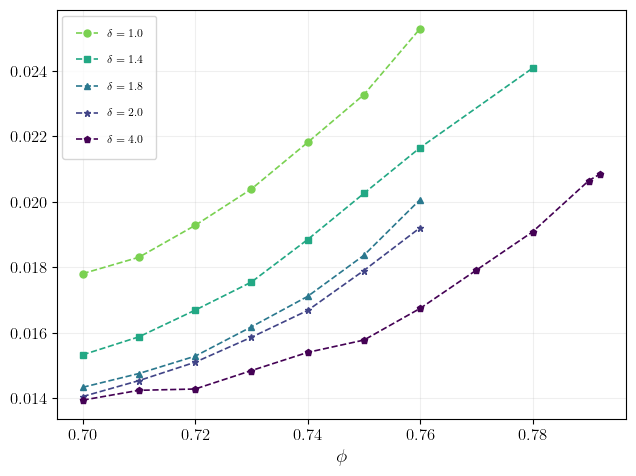

In [18]:
# min gap plot 1

phi = [0.70, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.792]

ar  = [1.0, 1.4, 1.8, 2.0, 4.0]
#gap = []
cmap = matplotlib.colormaps['viridis_r'] #color scheme
topDir = '/media/rahul/Rahul_2TB/high_bidispersity'
off =100
line_markers = ['o', 's', '^', '*', 'p']
for j, arj in enumerate(ar):
    gaplist = []
    for i, phii in enumerate(phi):
        gap = []
        phir = '{:.3f}'.format(phii) if len(str(phii).split('.')[1])>2 else '{:.2f}'.format(phii)
        for l in range(1):
            workDir = f'{topDir}/NP_1000/phi_{phir}/ar_{ar[j]}/Vr_0.5/run_{l+1}'
            if not os.path.exists(workDir):
                continue
            file_name = glob.glob(f'{workDir}/int_*.dat')[0]
            interFile   = open(f'{file_name}', 'r')
            contactList = interactionsList(interFile)
            for sampleList in contactList[off:]:
                    for i in range (sampleList.shape[0]):
                        if int(sampleList[i,10]) == 2:
                            g = sampleList[i,5]
                            gapPerc = -(g/2)*100
                            gap.append(gapPerc)
        gaplist.append(np.mean(gap))

    phif = [x for x, g in zip(phi, gaplist) if not np.isnan(g)]
    gaplistf = [x for x in gaplist if not np.isnan(x)]
    plt.plot(phif, gaplistf, linestyle='--',marker = line_markers[j], label=r'$\delta = {:.1f}$'.format(arj), color=cmap((j+1)/len(ar)),linewidth=1.2)

plt.grid(which='Both', alpha=0.2)
plt.xlabel(r'$\phi$', fontsize=14,fontstyle='italic')
plt.ylabel('% gap', fontsize=14,fontstyle='italic')

plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend()
plt.legend(loc='upper left', labelspacing=1.5,borderpad=1.2)
#plt.title('')
plt.tight_layout()

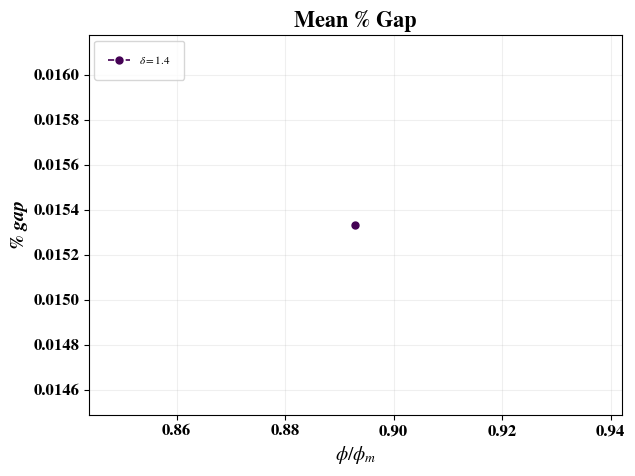

In [37]:
# min gap plot 3

plt.rcParams.update({
    "figure.max_open_warning": 0,
    "text.usetex": False,  # Disable full LaTeX rendering
    "font.family": "STIXGeneral",
    "mathtext.fontset": "stix",
    "font.size": 8,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8,
    "lines.linewidth": 1,
    "lines.markersize": 5
})

phi = [0.70]#, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.792]

ar  = [1.4]#, 1.4, 1.8, 2.0, 4.0]
gapall = []
phiall = []
phim=[0.7839319624271287,0.7833175449290914,0.7854135255405496,0.7884149255295934,0.818194260057053]
cmap = matplotlib.colormaps['viridis_r'] #color scheme
topDir = '/media/rahul/Rahul_2TB/high_bidispersity'
#topDir = '/Volumes/Rahul_2TB/high_bidispersity'
off =100
line_markers = ['o', 's', '^', '*', 'p']
for j, arj in enumerate(ar):
    gaplist = []
    gaplisterr=[]
    for i, phii in enumerate(phi):
        gap = []
        phir = '{:.3f}'.format(phii) if len(str(phii).split('.')[1])>2 else '{:.2f}'.format(phii)
        for l in range(1):
            workDir = f'{topDir}/NP_1000/phi_{phir}/ar_{ar[j]}/Vr_0.5/run_{l+1}'
            if not os.path.exists(workDir):
                continue
            file_name1 = glob.glob(f'{workDir}/int_*.dat')[0]
            interFile   = open(f'{file_name1}', 'r')
            contactList = interactionsList(interFile)

            # file_name2 = glob.glob(f'{workDir}/int_*.dat')[0]
            # paramsFile   = open(f'{file_name2}', 'r')
            # parList      = parametersList(paramsFile)
            for sampleList in contactList[off:]:
                    for i in range (sampleList.shape[0]):
                        if int(sampleList[i,10]) == 2:
                            g = sampleList[i,5]
                            gapPerc = -(g/2)*100
                            gap.append(gapPerc)
        gaplist.append(np.mean(gap))
        gaplisterr.append(np.std(gap))

    phif = [x/phim[j] for x, g in zip(phi, gaplist) if not np.isnan(g)]
    gaplistf = [x for x in gaplist if not np.isnan(x)]
    gapall.append(gaplistf)
    phiall.append(phif)
    #gaplisterrf=[x for x in gaplisterr if not np.isnan(x)]
    #plt.errorbar(phif, gaplistf, yerr=gaplisterrf, linestyle='--',marker = line_markers[j], label=r'$\delta = {:.1f}$'.format(arj), color=cmap((j+1)/len(ar)),linewidth=1.2)
    plt.plot(phif, gaplistf, linestyle='--',marker = line_markers[j], label=r'$\delta = {:.1f}$'.format(arj), color=cmap((j+1)/len(ar)),linewidth=1.2)

plt.grid(which='Both', alpha=0.2)
plt.xlabel(r'$\phi/\phi_{m}$', fontsize=14,fontstyle='italic', fontweight='bold')
plt.ylabel(r'% gap', fontsize=14,fontstyle='italic', fontweight='bold')

plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.legend()
plt.legend(loc='upper left', labelspacing=1.5,borderpad=1.2)
plt.title(r'Mean % Gap', fontsize=16, fontweight='bold')
plt.tight_layout()

In [7]:
# overlap check

phi = [0.70] #, 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77, 0.78, 0.79, 0.792]

ar  = [1.4] #, 1.4, 1.8, 2.0, 4.0]

topDir = '/media/rahul/Rahul_2TB/high_bidispersity'
off =100

for j, arj in enumerate(ar):
    gaplist = []
    #gaplisterr=[]
    for i, phii in enumerate(phi):
        gap = []
        phir = '{:.3f}'.format(phii) if len(str(phii).split('.')[1])>2 else '{:.2f}'.format(phii)
        for l in range(1):
            workDir = f'{topDir}/NP_1000/phi_{phir}/ar_{ar[j]}/Vr_0.5/run_{l+1}'
            if not os.path.exists(workDir):
                continue
            file_name1 = glob.glob(f'{workDir}/int_*.dat')[0]
            interFile   = open(f'{file_name1}', 'r')
            contactList = interactionsList(interFile)

            file_name2 = glob.glob(f'{workDir}/par_*.dat')[0]
            #paramsFile   = open(f'{file_name2}', 'r')
            parList      = parametersList(file_name2)
            shearate = np.loadtxt(glob.glob(f'{workDir}/data_*.dat')[0])[:,2]
            with open(file_name1, 'r') as file:
                lines = file.readlines()  # Read all lines
                lx = float(lines[3].split()[-1])
    
            for k, sampleList in enumerate(contactList[off:]):
                    for i in range (sampleList.shape[0]):
                        if int(sampleList[i,10]) == 2:
                            index1 = int(sampleList[i,0])
                            index2 = int(sampleList[i,1])
                            r1 = parList[off+k][index1, 1]
                            r2 = parList[off+k][index2, 1]

                            rsum = r1 + r2

                            posx1 = lx/2 + parList[off+k][index1, 2]
                            posy1 = lx/2 + parList[off+k][index1, 3]

                            posx2 = lx/2 + parList[off+k][index2, 2]
                            posy2 = lx/2 + parList[off+k][index2, 3]

                            xdist = abs(posx1-posx2)
                            ydist = abs(posy1-posy2)
                            xdist -= shearate[off+k]*lx * np.round(xdist / lx)
                            ydist -= lx * np.round(ydist / lx)

                            dist = np.sqrt(xdist**2 + ydist**2)

                            overlap = (rsum - dist)*100/rsum
                            gap.append(overlap)
        gaplist.append(np.mean(gap))
        print(f'phi = {phii}, ar = {arj}  - {np.mean(gap)} %')

phi = 0.7, ar = 1.4  - -22.093141277206666 %


In [9]:
#for l in range(numRuns):
topDir = '/Volumes/Rahul_2TB/high_bidispersity'
workDir = f'{topDir}/NP_1000/phi_0.75/ar_1.4/Vr_0.5/run_{1}'
file_name = glob.glob(f'{workDir}/data_*.dat')[0]
#filee = file_name
with open(f'{file_name}','r') as file:
    data_array = np.loadtxt(file) 
    data = data_array[:, 3]

In [10]:
np.mean(data[100:])

928.1126212519725

In [7]:
# getting parameter from simulation

numRuns=4

phi = [0.70,0.71,0.72,0.73,0.74,0.75,0.76,0.77,0.78,0.79, 0.792]

ar  = [1.0, 1.4, 1.8, 2.0, 4.0]

phi_vals  = phi
arr       = ar
off = 100
topDir = '/Volumes/Rahul_2TB/high_bidispersity'

for j, arj in enumerate(arr):
    visc = []
    for i, phii in enumerate(phi_vals):
        dat = []
        phir = '{:.3f}'.format(phii) if len(str(phii).split('.')[1])>2 else '{:.2f}'.format(phii)
        for l in range(numRuns):
            workDir = f'{topDir}/NP_1000/phi_{phir}/ar_{ar[j]}/Vr_0.5/run_{l+1}'
            if not os.path.exists(workDir):
                continue
            file_name = glob.glob(f'{workDir}/data_*.dat')[0]
            with open(f'{file_name}','r') as file:
                data_array = np.loadtxt(file) 
                data = data_array[:, 3][off:]
                dat.append(np.mean(data))
                #print(dat)
        visc.append(np.mean(dat))